Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Sheet Names: ['Sheet1', 'malaysia_house_price_data_2025']

Penang Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 1977
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Township      187 non-null    object
 1   Area          187 non-null    object
 2   State         187 non-null    object
 3   Tenure        187 non-null    object
 4   Type          187 non-null    object
 5   Median_Price  187 non-null    int64 
 6   Median_PSF    187 non-null    int64 
 7   Transactions  187 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 13.1+ KB
None

Sample Data:
                               Township           Area  

/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_68342/3584616813.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transactions', y='Township', data=top_townships, ax=axs[0, 0], palette="viridis")
/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_68342/3584616813.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.values, y=avg_price_by_type.index, ax=axs[0, 1], palette="magma")
/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_68342/3584616813.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  s

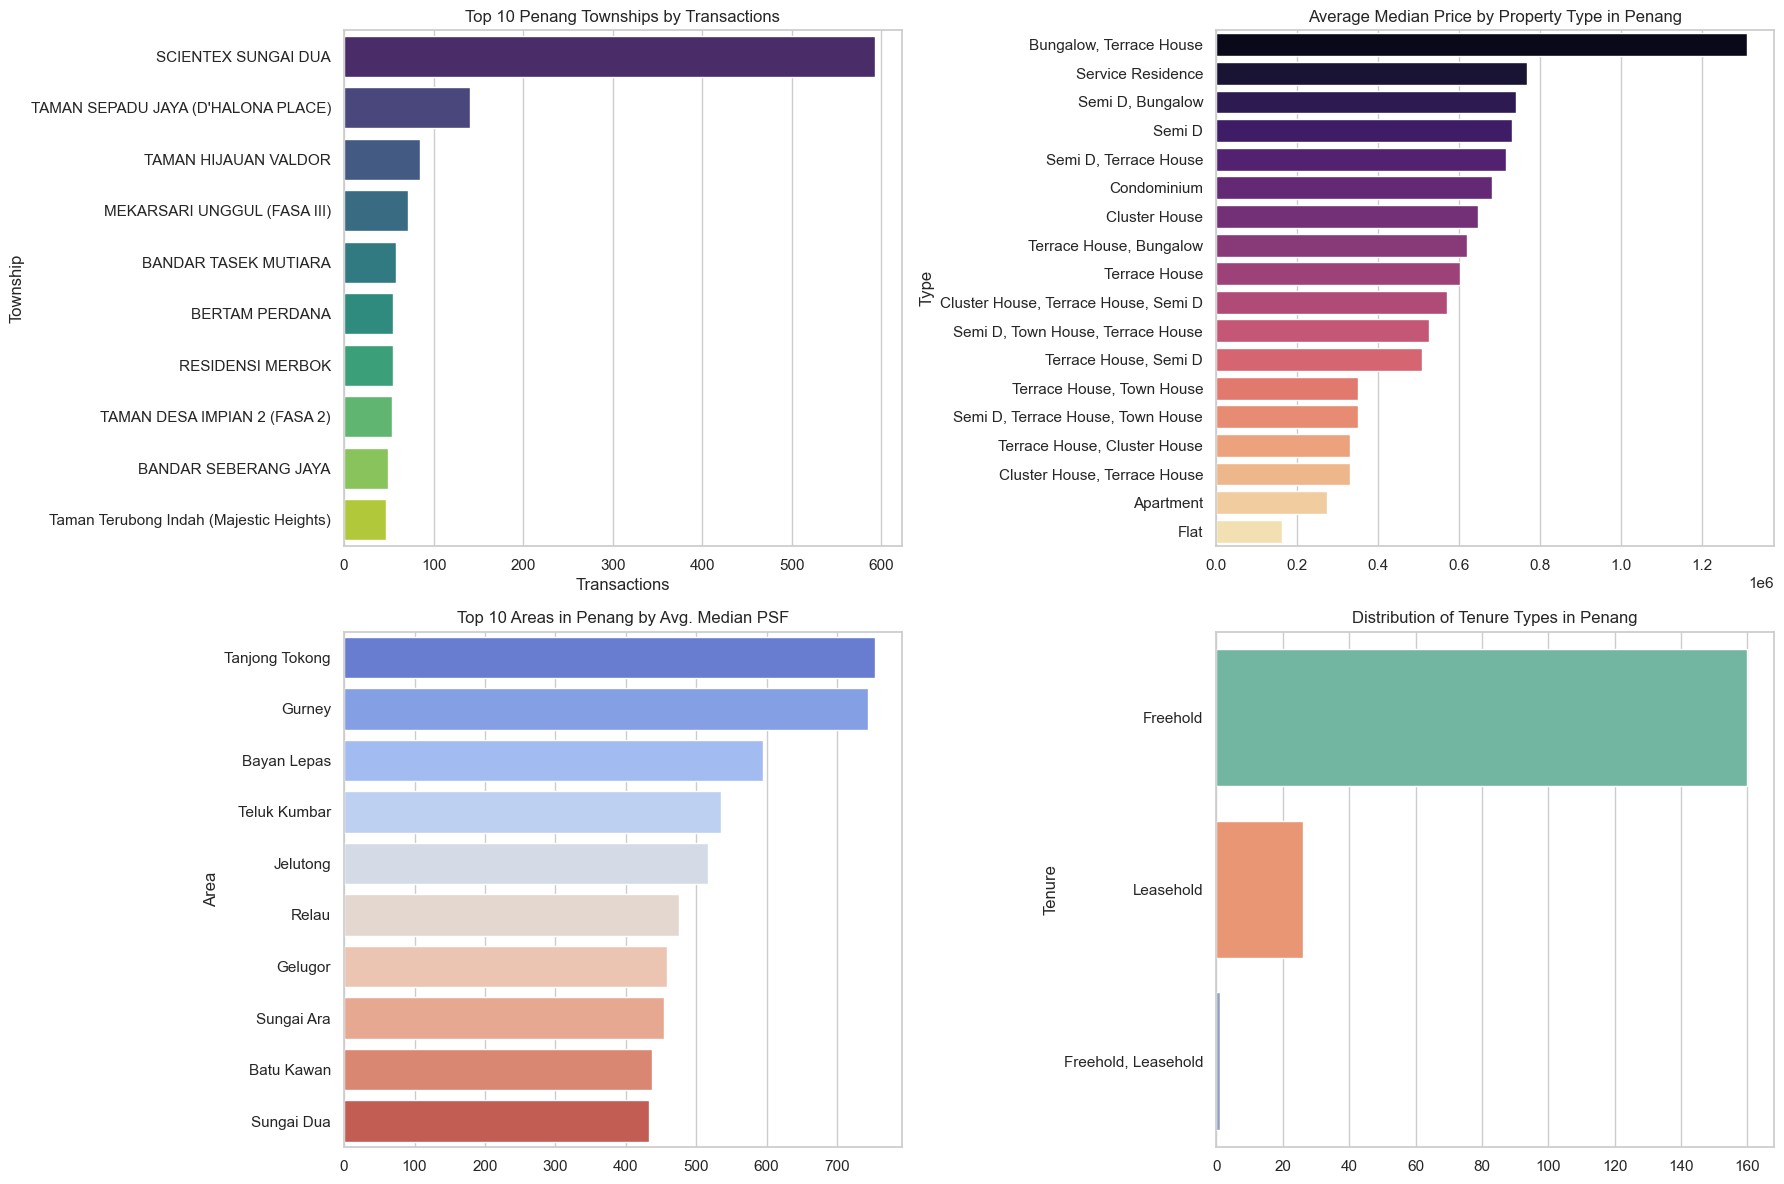

In [5]:
# PenangPropInsight: ML-Powered Property Investment Analysis in Penang

# Install required package
%pip install openpyxl

# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Set Styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 📂 Load the Dataset
file_path = "houses_data.xlsx"  # Ensure this is in the same directory
excel_file = pd.ExcelFile(file_path)

# 📄 View Sheet Names
print("Sheet Names:", excel_file.sheet_names)

# 📊 Load Data
df = excel_file.parse('malaysia_house_price_data_2025')

# 🔍 Filter for Penang Only
penang_df = df[df['State'].str.lower() == 'penang'].copy()

# 🧼 Basic Info
print("\nPenang Dataset Info:")
print(penang_df.info())
print("\nSample Data:")
print(penang_df.head())

# -----------------------------------------------
# 📈 Exploratory Data Analysis (EDA)
# -----------------------------------------------

# 1️⃣ Top 10 Townships by Transactions
top_townships = penang_df.sort_values(by='Transactions', ascending=False).head(10)

# 2️⃣ Average Median Price by Property Type
avg_price_by_type = penang_df.groupby('Type')['Median_Price'].mean().sort_values(ascending=False)

# 3️⃣ Average Median PSF by Area (Top 10)
avg_psf_by_area = penang_df.groupby('Area')['Median_PSF'].mean().sort_values(ascending=False).head(10)

# 4️⃣ Distribution of Tenure Types
tenure_counts = penang_df['Tenure'].value_counts()

# 📊 Plotting
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top 10 Townships by Transactions
sns.barplot(x='Transactions', y='Township', data=top_townships, ax=axs[0, 0], palette="viridis")
axs[0, 0].set_title("Top 10 Penang Townships by Transactions")

# Plot 2: Average Median Price by Property Type
sns.barplot(x=avg_price_by_type.values, y=avg_price_by_type.index, ax=axs[0, 1], palette="magma")
axs[0, 1].set_title("Average Median Price by Property Type in Penang")

# Plot 3: Top 10 Areas by Avg. Median PSF
sns.barplot(x=avg_psf_by_area.values, y=avg_psf_by_area.index, ax=axs[1, 0], palette="coolwarm")
axs[1, 0].set_title("Top 10 Areas in Penang by Avg. Median PSF")

# Plot 4: Distribution of Tenure Types
sns.barplot(x=tenure_counts.values, y=tenure_counts.index, ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("Distribution of Tenure Types in Penang")

plt.tight_layout()
plt.show()

/Users/daniyalrosli/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/daniyalrosli/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


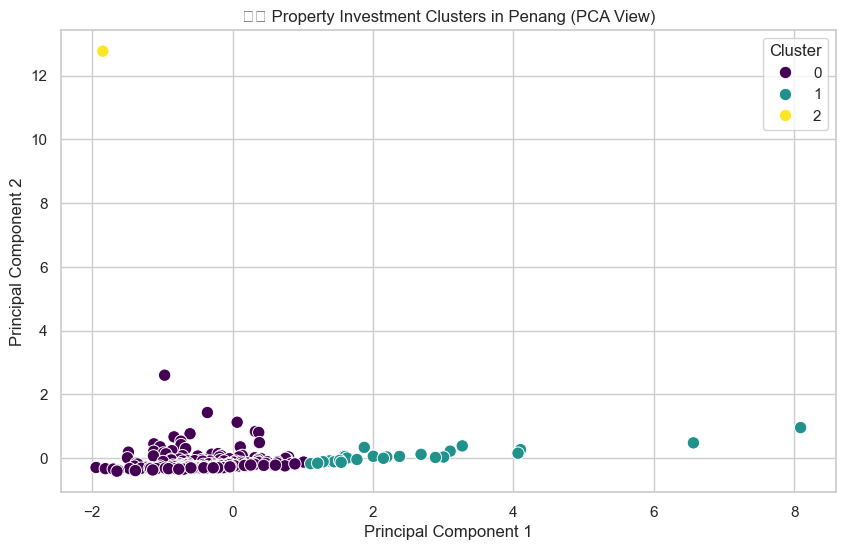

In [6]:
# 📦 Import ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 🧪 Select Features for Clustering
features = penang_df[['Median_Price', 'Median_PSF', 'Transactions']].copy()

# 🧼 Handle any missing values
features = features.dropna()

# 🔄 Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 🤖 Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can experiment with n_clusters
clusters = kmeans.fit_predict(scaled_features)

# 🧷 Add Clusters to Original Data
penang_df.loc[features.index, 'Cluster'] = clusters

# 📉 Reduce Dimensions for Visualization (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# 🎨 Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis', s=80)
plt.title("🏘️ Property Investment Clusters in Penang (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_68342/2723963873.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')
/Users/daniyalrosli/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daniyalrosli/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daniyalrosli/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_68342/2723963873.py:79: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/daniy

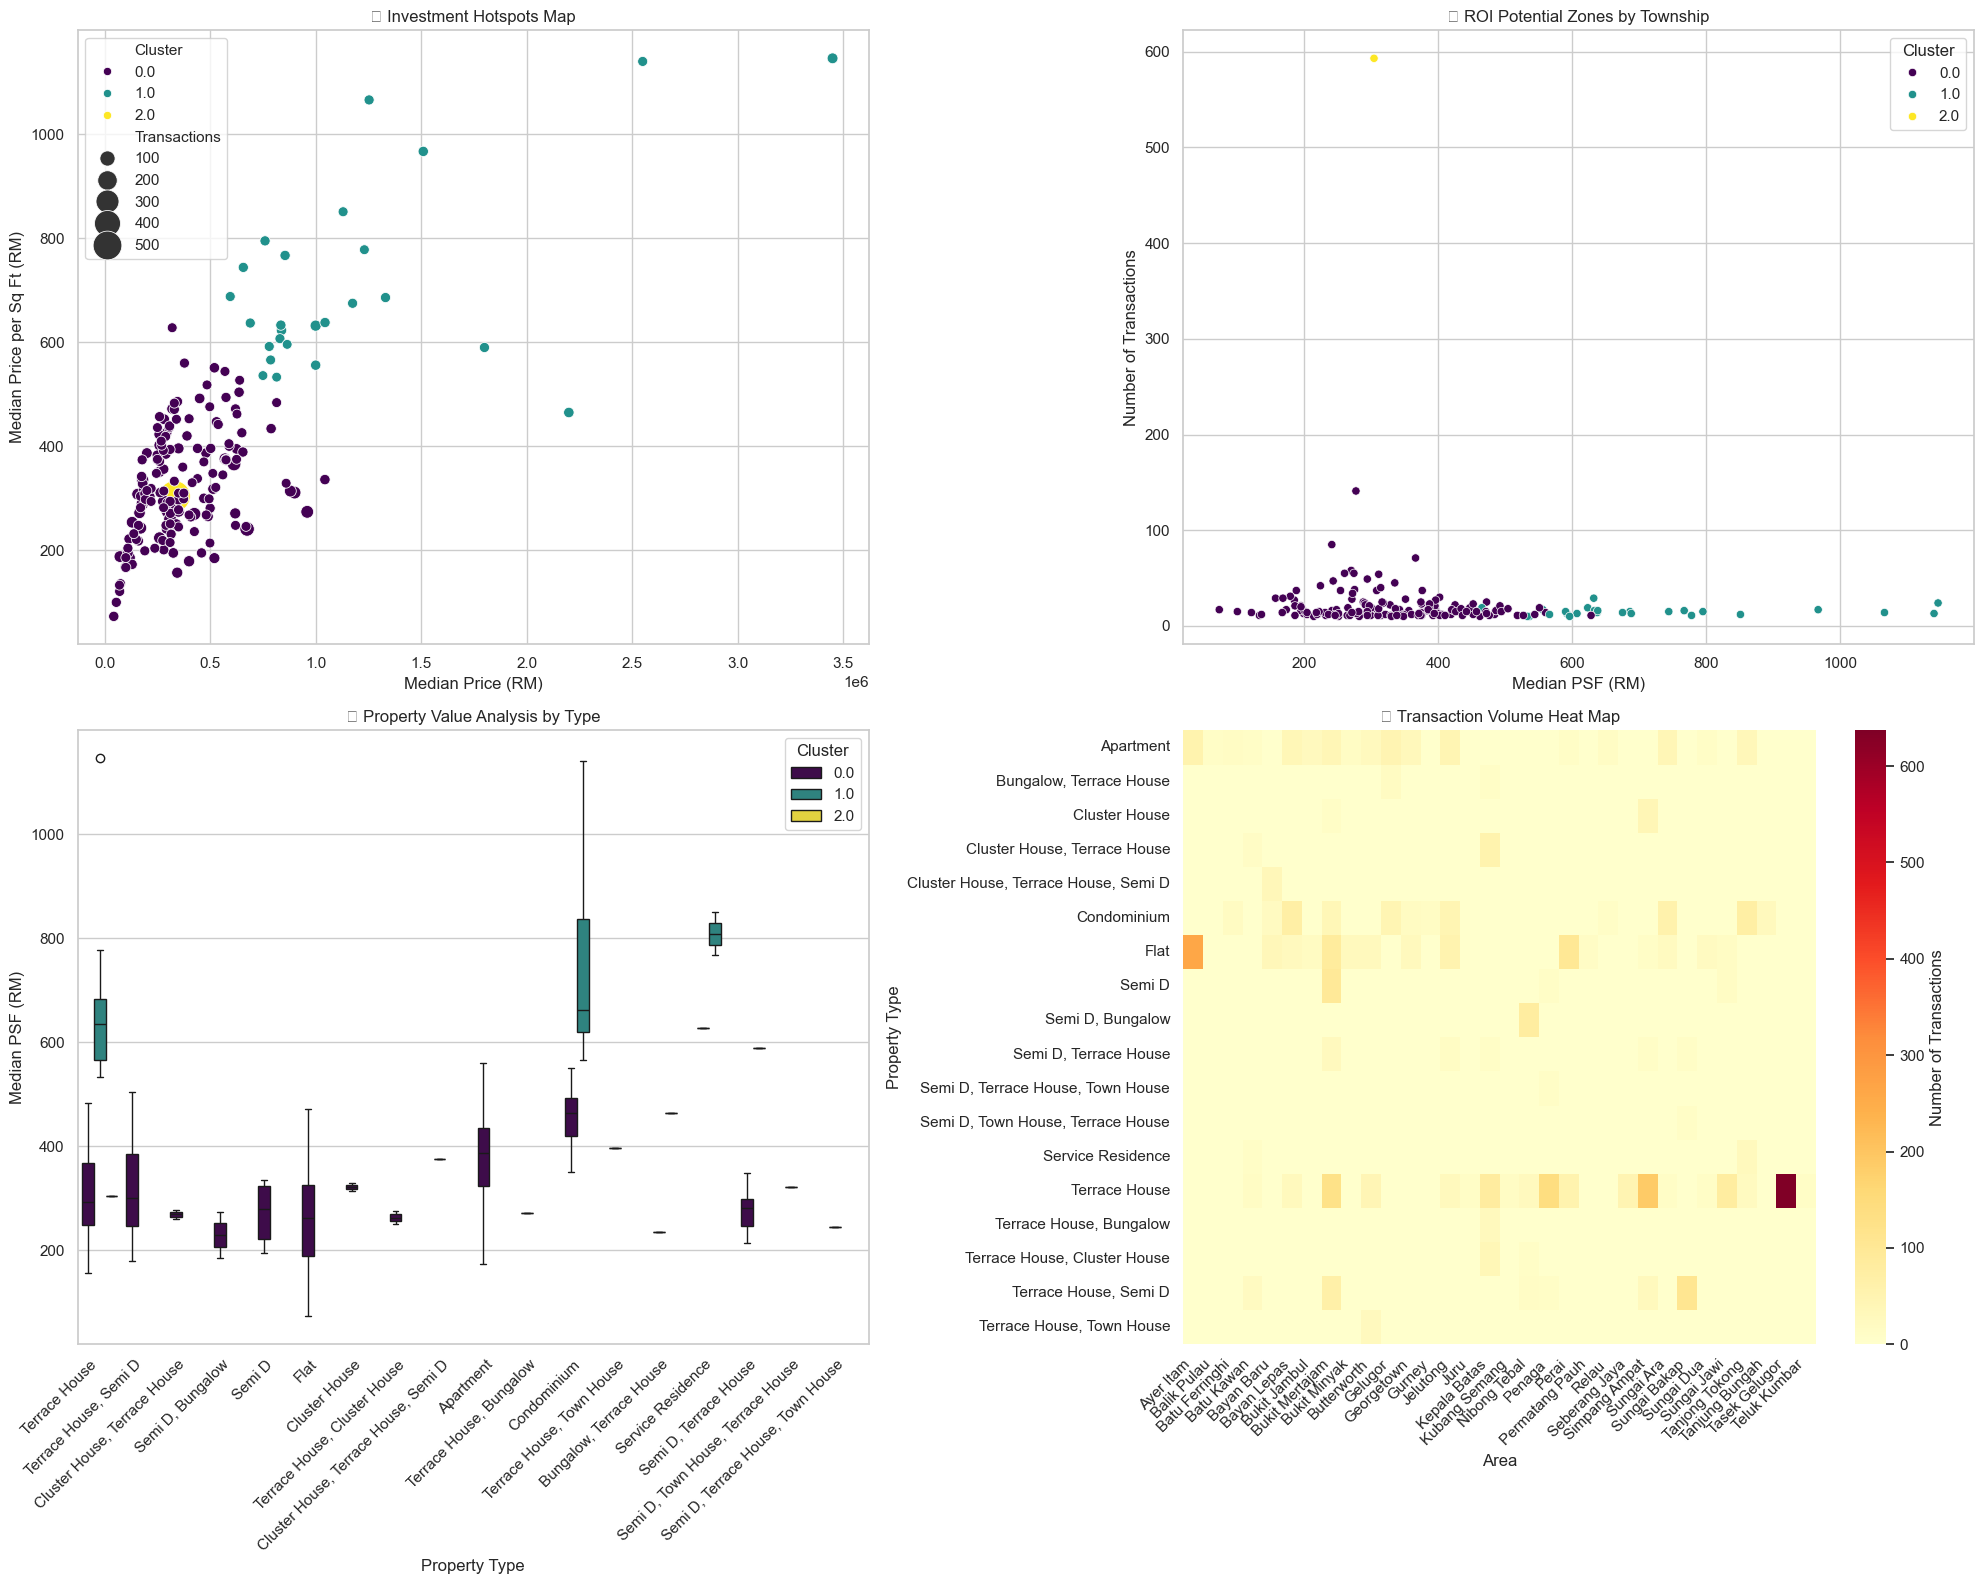

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# 1. Investment Hotspots Map (Price vs PSF with transaction volume)
sns.scatterplot(
    data=penang_df,
    x='Median_Price',
    y='Median_PSF',
    size='Transactions',
    hue='Cluster',
    palette='viridis',
    sizes=(50, 500),
    ax=axs[0, 0]
)
axs[0, 0].set_title('🎯 Investment Hotspots Map')
axs[0, 0].set_xlabel('Median Price (RM)')
axs[0, 0].set_ylabel('Median Price per Sq Ft (RM)')

# 2. ROI Potential Zones (Transaction Volume vs Price)
median_psf = penang_df.groupby('Township')['Median_PSF'].median()
median_transactions = penang_df.groupby('Township')['Transactions'].median()
cluster_by_township = penang_df.groupby('Township')['Cluster'].first()

roi_df = pd.DataFrame({
    'Township': median_psf.index,
    'Median_PSF': median_psf.values,
    'Transactions': median_transactions.values,
    'Cluster': cluster_by_township.values
})

sns.scatterplot(
    data=roi_df,
    x='Median_PSF',
    y='Transactions',
    hue='Cluster',
    palette='viridis',
    ax=axs[0, 1]
)
axs[0, 1].set_title('💰 ROI Potential Zones by Township')
axs[0, 1].set_xlabel('Median PSF (RM)')
axs[0, 1].set_ylabel('Number of Transactions')

# 3. Value Analysis by Property Type
sns.boxplot(
    data=penang_df,
    x='Type',
    y='Median_PSF',
    hue='Cluster',
    palette='viridis',
    ax=axs[1, 0]
)
axs[1, 0].set_title('📊 Property Value Analysis by Type')
axs[1, 0].set_xlabel('Property Type')
axs[1, 0].set_ylabel('Median PSF (RM)')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')

# 4. Transaction Volume Heat Map
pivot_data = penang_df.pivot_table(
    values='Transactions',
    index='Type',
    columns='Area',
    aggfunc='sum'
).fillna(0)

sns.heatmap(
    pivot_data,
    cmap='YlOrRd',
    ax=axs[1, 1],
    cbar_kws={'label': 'Number of Transactions'}
)
axs[1, 1].set_title('🔥 Transaction Volume Heat Map')
axs[1, 1].set_xlabel('Area')
axs[1, 1].set_ylabel('Property Type')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
